### Ponemos encoding='cp1252' para que se pueda leer ya que está en otra codificación la cual no se puede leer de manera normal.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv("./dirty_dataset.csv", encoding='cp1252')

In [49]:
datos.head()

,Paï¿½s/Region!!,Region,Happiness Rank,SCORE_FELICIDAD (2015),Standard Error,Economï¿½a,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switz3rland,WESTERN EUROPE,1,7.587,0.03411,1.39651 ï¿½,"1,34951",0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,WESTERN EUROPE,2,7.561,0.04884,1.30232 ï¿½,"1,40223",0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,WESTERN EUROPE,3,7.527,0.03328,1.32548 ï¿½,"1,36058",0.87464,0.64938,0.48357,0.34139,2.49204
3,Nor-way,WESTERN EUROPE,4,7.522,0.03880,1.459 ï¿½,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Ivï¿½n_espabila,NORTH AMERICA,5,7.427,0.03553,1.32629 ï¿½,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Limpieza de cabezera

In [50]:
datos.rename(columns={'Paï¿½s/Region!!': 'Pais_Region',
                      'Economï¿½a': 'Economia'}, inplace=True)

datos.head()

,Pais_Region,Region,Happiness Rank,SCORE_FELICIDAD (2015),Standard Error,Economia,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switz3rland,WESTERN EUROPE,1,7.587,0.03411,1.39651 ï¿½,"1,34951",0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,WESTERN EUROPE,2,7.561,0.04884,1.30232 ï¿½,"1,40223",0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,WESTERN EUROPE,3,7.527,0.03328,1.32548 ï¿½,"1,36058",0.87464,0.64938,0.48357,0.34139,2.49204
3,Nor-way,WESTERN EUROPE,4,7.522,0.03880,1.459 ï¿½,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Ivï¿½n_espabila,NORTH AMERICA,5,7.427,0.03553,1.32629 ï¿½,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Limpieza de datos con símbolos raros y pasados a datos numéricos en Economia y Family.

Miramos el tipo de dato de las tablas y identificamos las que no coinciden.

In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pais_Region                    163 non-null    object 
 1   Region                         163 non-null    object 
 2   Happiness Rank                 163 non-null    int64  
 3   SCORE_FELICIDAD (2015)         148 non-null    float64
 4   Standard Error                 163 non-null    float64
 5   Economia                       163 non-null    object 
 6   Family                         163 non-null    object 
 7   Health (Life Expectancy)       163 non-null    float64
 8   Freedom                        163 non-null    float64
 9   Trust (Government Corruption)  163 non-null    float64
 10  Generosity                     163 non-null    float64
 11  Dystopia Residual              163 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1

In [52]:
columna_economia_limpia = 'Economia' 
columna_family_limpia = 'Family' 


#Limpiamos los símbolos
datos[columna_economia_limpia] = datos[columna_economia_limpia].astype(str).str.extract(r'(\d+\.?\d*)', expand=False)
datos[columna_family_limpia] = datos[columna_family_limpia].astype(str).str.replace(',', '.', regex=False)


#Pasamos los datos a float64
datos[columna_family_limpia] = pd.to_numeric(datos[columna_family_limpia], errors='coerce')
datos[columna_economia_limpia] = pd.to_numeric(datos[columna_economia_limpia], errors='coerce')



datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pais_Region                    163 non-null    object 
 1   Region                         163 non-null    object 
 2   Happiness Rank                 163 non-null    int64  
 3   SCORE_FELICIDAD (2015)         148 non-null    float64
 4   Standard Error                 163 non-null    float64
 5   Economia                       163 non-null    float64
 6   Family                         163 non-null    float64
 7   Health (Life Expectancy)       163 non-null    float64
 8   Freedom                        163 non-null    float64
 9   Trust (Government Corruption)  163 non-null    float64
 10  Generosity                     163 non-null    float64
 11  Dystopia Residual              163 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Miramos que datos son NaN

In [53]:
datos.isna().sum()

Pais_Region                       0
Region                            0
Happiness Rank                    0
SCORE_FELICIDAD (2015)           15
Standard Error                    0
Economia                          0
Family                            0
Health (Life Expectancy)          0
Freedom                           0
Trust (Government Corruption)     0
Generosity                        0
Dystopia Residual                 0
dtype: int64

Vemos que solo hay NaN en la columna SCORE_FELICIDAD 

Haremos que los NaN tengan el valor de la media

Quitamos Outliers

In [54]:

columna_felicidad = 'SCORE_FELICIDAD (2015)' 

#Limpiar los valores atípicos (Outliers) de forma segura 
limite_superior = 10.0
limite_inferior = 0.0

condicion_outlier_superior = datos[columna_felicidad] > limite_superior
condicion_outlier_inferior = datos[columna_felicidad] < limite_inferior

datos.loc[condicion_outlier_superior, columna_felicidad] = np.nan
datos.loc[condicion_outlier_inferior, columna_felicidad] = np.nan

#Calcular la Media 
media_felicidad = datos[columna_felicidad].mean()

#Rellenar los NaN con la Media (uso seguro) 
datos[columna_felicidad] = datos[columna_felicidad].fillna(media_felicidad)

datos.isna().sum()

Pais_Region                      0
Region                           0
Happiness Rank                   0
SCORE_FELICIDAD (2015)           0
Standard Error                   0
Economia                         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### Eliminación de Regiones que no existen y corregido valores en mayúsculas

In [55]:
# Esto asegura que los valores sucios no interfieran.
# Asumo que todavía quedan filas con 'Narnia Region' o similares
datos['Region'] = datos['Region'].astype(str).str.upper()
datos['Region'] = datos['Region'].replace('NARNIA REGION', np.nan)
datos.dropna(subset=['Region'], inplace=True) # Eliminar filas con NaN en esta columna

# 3. Estandarizar la capitalización a MAYÚSCULAS
datos['Region'] = datos['Region'].str.upper()

### Eliminación de países inexistentes

In [56]:
# 1. Corregir Switz3rland -> Switzerland
datos['Pais_Region'] = datos['Pais_Region'].str.replace('Switz3rland', 'Switzerland', regex=False)

# 2. Corregir Nor-way -> Norway
datos['Pais_Region'] = datos['Pais_Region'].str.replace('Nor-way', 'Norway', regex=False)

# 3. Corregir Iv�n_espabila -> lo eliminamos por que no existe
datos['Pais_Region'] = datos['Pais_Region'].replace('Ivï¿½n_espabila', np.nan)
datos.dropna(subset=['Pais_Region'], inplace=True)

### Creamos un nuevo DataFrame limpio.

In [57]:
datos.to_csv("clean_dataset.csv", index=False)

## **Análisis**

In [58]:
# Asumiendo que datos y columnas_numericas ya están definidos

columna_felicidad = 'SCORE_FELICIDAD (2015)'
columna_economia = 'Economia'
columna_family = 'Family'
columna_region = 'Region'
columna_pais = 'Pais_Region'
columnas_numericas = [columna_felicidad, columna_economia, columna_family]

print("Estadísticas Datos Numéricos SCORE_FELICIDAD, Economia, Family")

# 1. Calcular el resumen completo (mean, median, std, min, max, cuartiles)
resumen_completo = datos[columnas_numericas].describe().T

# 2. Calcular la moda por separado y añadirla al resumen
moda_calculada = datos[columnas_numericas].mode().iloc[0]

# Añadir la moda como una nueva columna al resumen
resumen_completo['mode'] = moda_calculada

# Mostrar el resumen con la media, mediana, moda y otras estadísticas clave
print("\n--- (Media, Mediana, Moda, Desv. Estándar, Cuartiles) ---")
print(resumen_completo[['mean', '50%', 'mode', 'std', 'min', 'max']].round(3))

Estadísticas Datos Numéricos SCORE_FELICIDAD, Economia, Family

--- (Media, Mediana, Moda, Desv. Estándar, Cuartiles) ---
                         mean    50%   mode    std    min    max
SCORE_FELICIDAD (2015)  5.415  5.456  5.456  1.121  2.839  7.587
Economia                0.854  0.919  1.302  0.411  0.000  1.690
Family                  0.992  1.033  1.331  0.277  0.000  1.402


In [59]:
print("\n Recuentos de Frecuencia")

# Recuento de Frecuencia para la Región
print(f"\n--- Frecuencia de la Columna: {columna_region} ---")
frecuencia_region = datos[columna_region].value_counts()
print(frecuencia_region)

# Frecuencia de la Región en porcentaje
print("\n--- Frecuencia Relativa (Porcentaje) ---")
frecuencia_relativa = datos[columna_region].value_counts(normalize=True).mul(100).round(2)
print(frecuencia_relativa)

# Top 10 de Países (para no saturar la salida)
print(f"\n--- Top 10 de Países ({columna_pais}) ---")
frecuencia_pais = datos[columna_pais].value_counts().head(10)
print(frecuencia_pais)


 Recuentos de Frecuencia

--- Frecuencia de la Columna: Region ---
Region
SUB-SAHARAN AFRICA                       40
CENTRAL AND EASTERN EUROPE               25
WESTERN EUROPE                           20
MIDDLE EAST AND NORTHERN AFRICA          19
LATIN AMERICA AND CARIBBEAN              17
SOUTHEASTERN ASIA                         9
SOUTHERN ASIA                             7
EASTERN ASIA                              6
   WESTERN EUROPE                         5
   LATIN AMERICA AND CARIBBEAN            3
AUSTRALIA AND NEW ZEALAND                 2
   NORTH AMERICA                          1
   MIDDLE EAST AND NORTHERN AFRICA        1
Name: count, dtype: int64

--- Frecuencia Relativa (Porcentaje) ---
Region
SUB-SAHARAN AFRICA                       25.81
CENTRAL AND EASTERN EUROPE               16.13
WESTERN EUROPE                           12.90
MIDDLE EAST AND NORTHERN AFRICA          12.26
LATIN AMERICA AND CARIBBEAN              10.97
SOUTHEASTERN ASIA                         5


 Visualizaciones


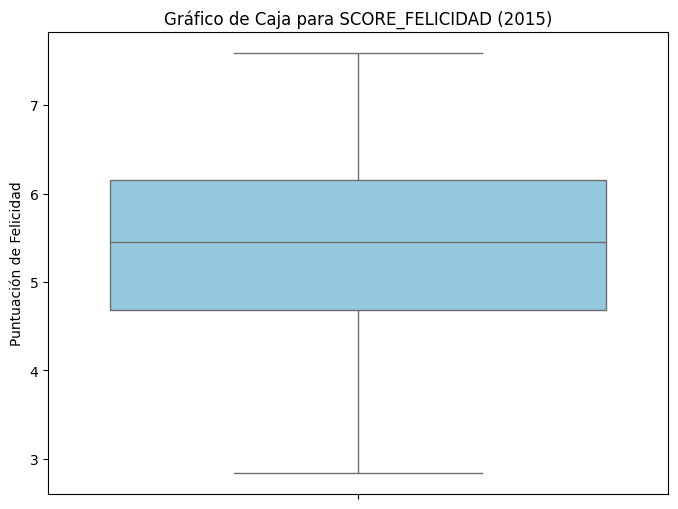

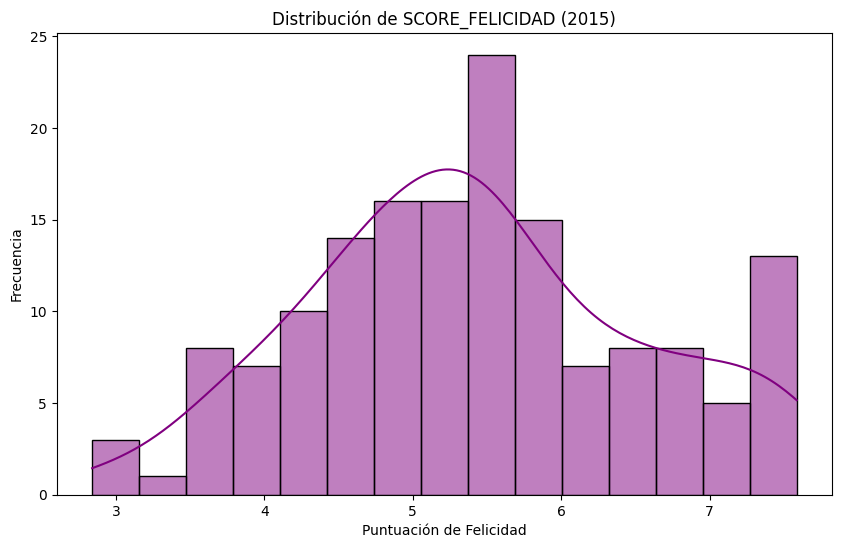

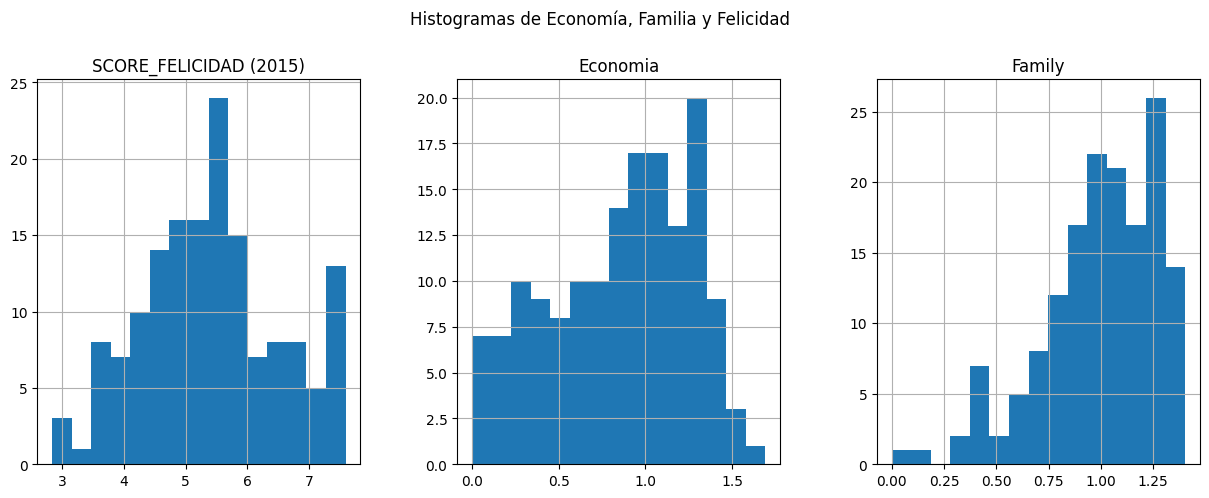

In [60]:
print("\n Visualizaciones")

# Gráfico de Caja (Boxplot) para la Felicidad
plt.figure(figsize=(8, 6))
sns.boxplot(y=datos[columna_felicidad], color='skyblue')
plt.title(f'Gráfico de Caja para {columna_felicidad}')
plt.ylabel('Puntuación de Felicidad')
plt.show()

# Histograma para la Felicidad
plt.figure(figsize=(10, 6))
sns.histplot(datos[columna_felicidad], bins=15, kde=True, color='purple')
plt.title(f'Distribución de {columna_felicidad}')
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Frecuencia')
plt.show()

# Distribuciones de las otras variables numéricas
datos[columnas_numericas].hist(bins=15, figsize=(15, 5), layout=(1, 3))
plt.suptitle('Histogramas de Economía, Familia y Felicidad', y=1.02)
plt.show()

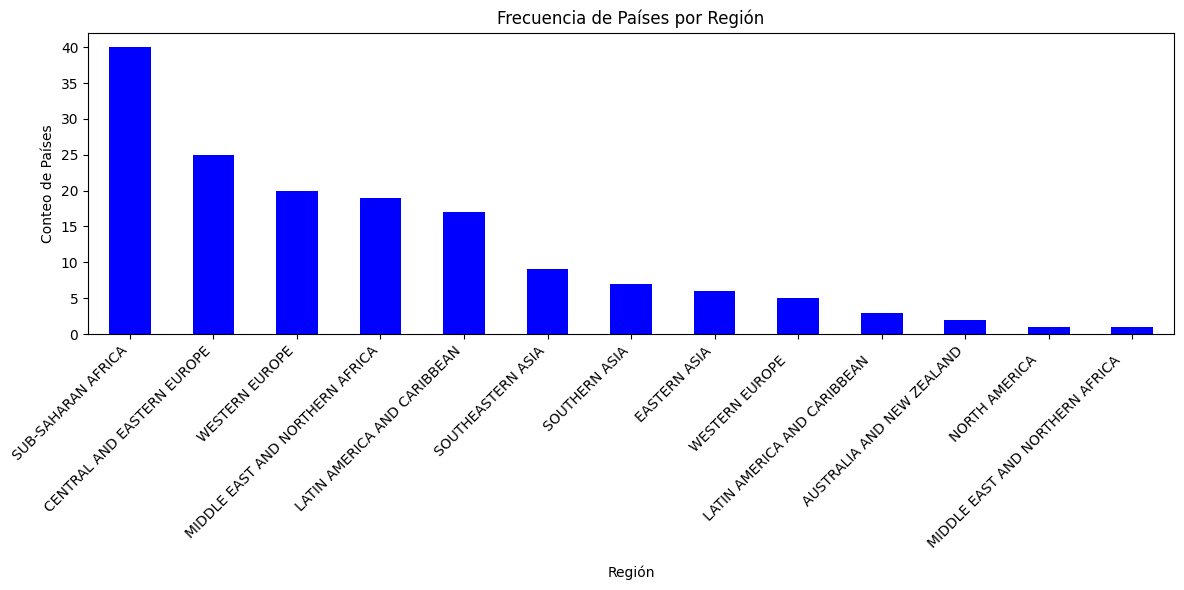

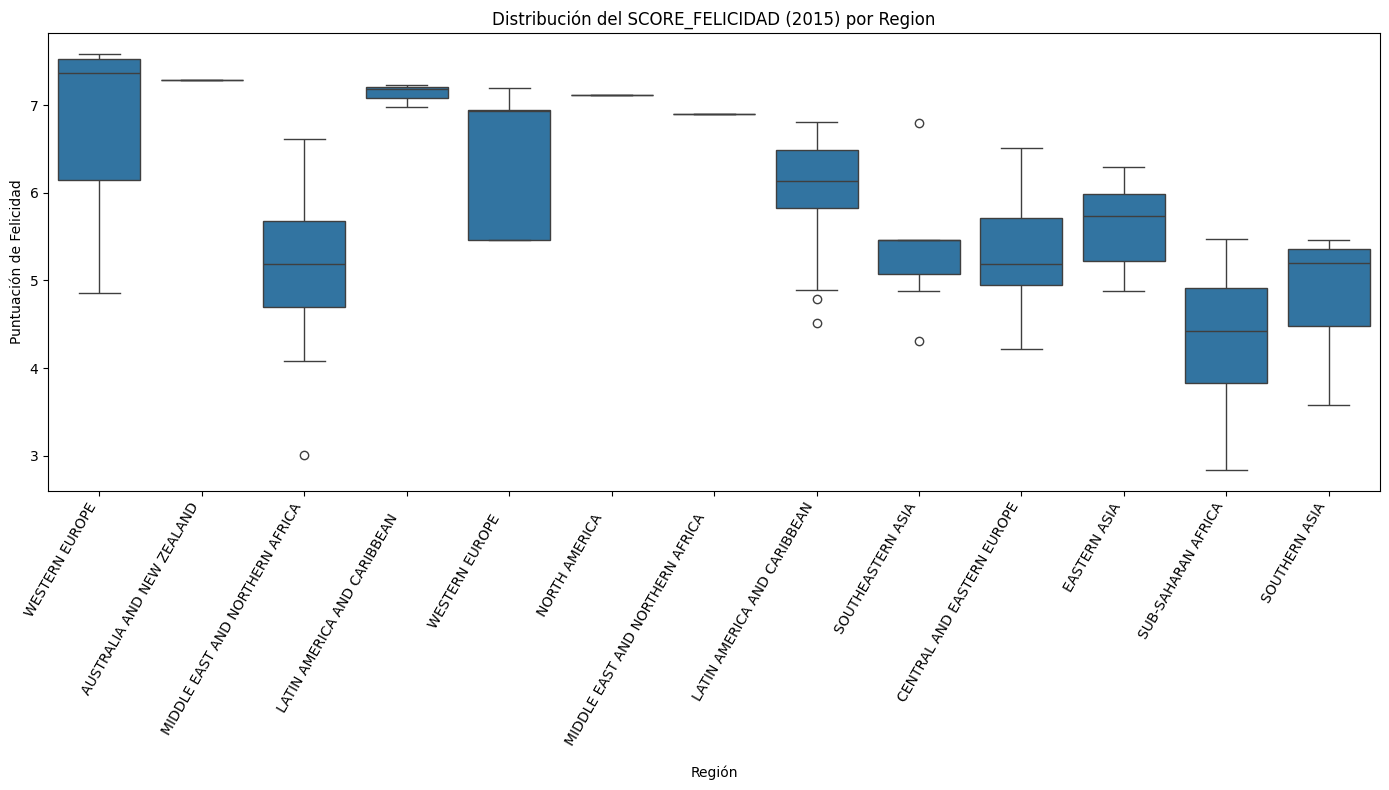

In [61]:
# Gráfico de Barras para la Frecuencia de Regiones
plt.figure(figsize=(12, 6))
frecuencia_region.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Frecuencia de Países por Región')
plt.xlabel('Región')
plt.ylabel('Conteo de Países')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Gráfico de Caja de Felicidad por Región (Análisis Bivariado)
plt.figure(figsize=(14, 8))
sns.boxplot(x=columna_region, y=columna_felicidad, data=datos)
plt.title(f'Distribución del {columna_felicidad} por {columna_region}')
plt.xlabel('Región')
plt.ylabel('Puntuación de Felicidad')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()